In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mtcars
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
data = pd.read_csv("./movies.csv")

In [3]:
data.head()

,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,0,52287414,Stand by Me,R,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,1,70136369,Ferris Bueller's Day Off,PG-13,2,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,2,179800601,Top Gun,PG,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,2,85160248,Aliens,R,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,0,18564613,Flight of the Navigator,PG,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
data.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'genre_encoded',
       'gross', 'name', 'rating', 'rating_encoded', 'released', 'runtime',
       'score', 'star', 'votes', 'writer', 'year released'],
      dtype='object')

In [5]:
data.isnull().sum(axis=0) # checked to make sure there is no missing data

budget            0
company           0
country           0
director          0
genre             0
genre_encoded     0
gross             0
name              0
rating            0
rating_encoded    0
released          0
runtime           0
score             0
star              0
votes             0
writer            0
year released     0
dtype: int64

In [6]:
movies_before_2000 = data[data['year released'] < 2000]
print("There are " + str(len(movies_before_2000)) + " movies from the dataset that were released before 2000.")
movies_before_2000.tail()

There are 3080 movies from the dataset that were released before 2000.


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
3075,0,3B Productions,France,Bruno Dumont,Drama,3,113495,Humanité,Not specified,5,1999-10-27,148,6.9,Emmanuel Schotté,3105,Bruno Dumont,1999
3076,0,C.E.O. Films,USA,George Haas,Drama,3,94633,Friends & Lovers,R,3,1999-04-16,100,4.5,Stephen Baldwin,1330,Neill Barry,1999
3077,312000,Spanky Pictures,USA,Gavin O'Connor,Drama,3,1281176,Tumbleweeds,PG-13,2,2000-03-03,102,6.7,Janet McTeer,3018,Angela Shelton,1999
3078,0,Cinerenta Medienbeteiligungs KG,USA,Scott Elliott,Drama,3,544538,A Map of the World,R,3,2000-01-21,125,6.7,Sigourney Weaver,3659,Jane Hamilton,1999
3079,7500000,Code Productions,USA,Robert Marcarelli,Action,2,12614346,The Omega Code,PG-13,2,1999-08-27,100,3.5,Casper Van Dien,4762,Stephan Blinn,1999


In [7]:
movies_2000_and_after = data[data['year released'] >= 2000]
print("There are " + str(len(movies_2000_and_after)) + " movies from the dataset that were released after 2000.")
movies_2000_and_after.tail()

There are 3740 movies from the dataset that were released after 2000.


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,1,4750497,Absolutely Fabulous: The Movie,R,3,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,3,28368,Mothers and Daughters,PG-13,2,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. 7,USA,Sam Liu,Animation,7,3775000,Batman: The Killing Joke,R,3,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,3,25981,The Eyes of My Mother,R,3,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016
6819,0,Les Productions du Trésor,France,Nicole Garcia,Drama,3,37757,From the Land of the Moon,R,3,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016


# Question 1:
## What is the relationship between movie budget and revenue (gross), and is that relationship different for movies that came out before 2000 compared to movies that came out after 2000?

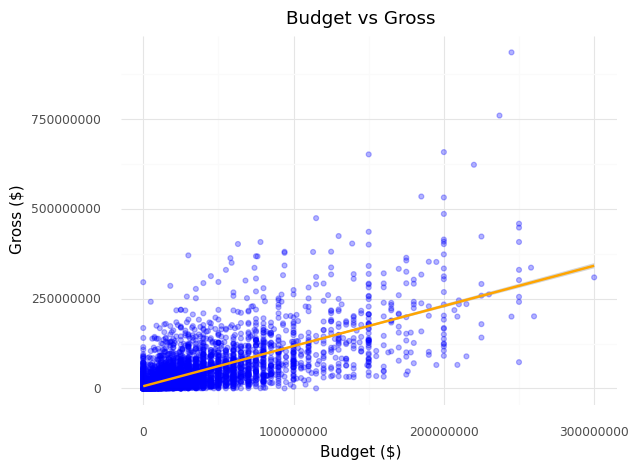

<ggplot: (313918443)>

In [8]:
(ggplot(data, aes(x = 'budget', y = 'gross')) + geom_point(colour = 'blue', alpha = 0.30) + theme_minimal() + ggtitle("Budget vs Gross") + labs(x = "Budget ($)", y = "Gross ($)") + geom_smooth(method = "lm", colour = 'orange'))

In [9]:
# labsList = ['Movies Released Before 2000', 'Movies Released 2000 and After']
year_assignments = []
for i in data['year released']:
    if i >= 2000:
        year_assignments.append(1)
    else:
        year_assignments.append(0)
len(year_assignments)

6820

In [10]:
data['year_assignments'] = year_assignments
data.tail()

,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released,year_assignments
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,1,4750497,Absolutely Fabulous: The Movie,R,3,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,1
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,3,28368,Mothers and Daughters,PG-13,2,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,1
6817,3500000,Warner Bros. 7,USA,Sam Liu,Animation,7,3775000,Batman: The Killing Joke,R,3,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,1
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,3,25981,The Eyes of My Mother,R,3,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,1
6819,0,Les Productions du Trésor,France,Nicole Garcia,Drama,3,37757,From the Land of the Moon,R,3,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,1


In [11]:
labsList = ["Cluster " + str(i) for i in year_assignments]
label_titles = ['Movies Released Before 2000', 'Movies Released 2000 and After']
print("Testing out the labsList list: ")
print(labsList[1000])
print(labsList[6000])

Testing out the labsList list: 
Cluster 0
Cluster 1


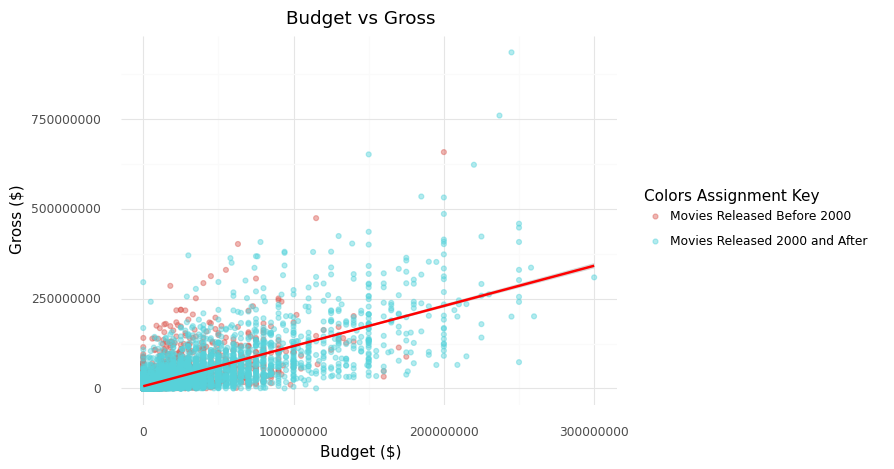

<ggplot: (314105694)>

In [12]:
(ggplot(data, aes(x = 'budget', y = 'gross', colour = "factor(year_assignments)")) 
 + geom_point(alpha = 0.45) 
 + theme_minimal() 
 + ggtitle("Budget vs Gross") 
 + labs(x = "Budget ($)", y = "Gross ($)") 
 + geom_smooth(method = "lm", colour = 'red')
 + scale_color_discrete(name = "Colors Assignment Key",
                       labels = label_titles)
)

## Anaylsis Plan
- The best way to start analyzing the relationship between movies' budgets and their respected gross profits is with visualization. The first visualization is to make a scatter plot of the features plotted against one another. The scatter plot visually depicts how these 2 variables (budget and gross) are related. It gives us insight on how 1 of the variables affects the other. Normally we cannot draw any concrete conclusions from this insight, but it gives inspiration on how to better analyze their relationship going forward. With this insight we can determine which types of models would be best to further analyze the relationship between the 2 variables. 

# Question 2

## 2. Using the number of user votes as a proxy for movie popularity, are certain genres, (action, drama, and adventure),  of movies more popular than others?

In [13]:
print("The dataset contains all of these genres: \n")
for i in data['genre'].unique():
    print(i)
print("\n")
print("However, we are only interested in action, drama, and adventure for this question.")

The dataset contains all of these genres: 

Adventure
Comedy
Action
Drama
Crime
Thriller
Horror
Animation
Biography
Sci-Fi
Musical
Family
Fantasy
Mystery
War
Romance
Western


However, we are only interested in action, drama, and adventure for this question.


In [14]:
print("All of the movies that are considered an action, drama, or adventure genre\nare found and then stored in the variable called data_genre_filtered")
desired_genres = ['Action', 'Adventure', 'Drama']
data_genre_filtered = data[data['genre'].isin(desired_genres)]
data_genre_filtered.head()

All of the movies that are considered an action, drama, or adventure genre
are found and then stored in the variable called data_genre_filtered


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released,year_assignments
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,0,52287414,Stand by Me,R,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,0
2,15000000,Paramount Pictures,USA,Tony Scott,Action,2,179800601,Top Gun,PG,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,0
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,2,85160248,Aliens,R,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,0
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,0,18564613,Flight of the Navigator,PG,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,0
5,6000000,Hemdale,UK,Oliver Stone,Drama,3,138530565,Platoon,R,3,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,0


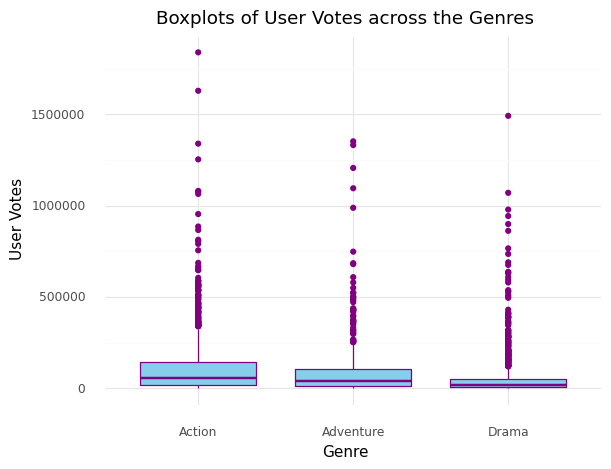

<ggplot: (277600726)>

In [15]:
(ggplot(data_genre_filtered, aes(x = 'genre', y='votes')) + geom_boxplot(stat = "boxplot", color = "purple", fill="skyblue") + theme_minimal() + ggtitle("Boxplots of User Votes across the Genres") + labs(x = "Genre", y = "User Votes"))

In [16]:
# init dict that will hold avg votes for each desired genre
user_votes_genres = {
    "Action": {
        "avg_user_votes": 0,
        "genre": 'Action',
        "count": 0
    },
    "Adventure": {
        "avg_user_votes": 0,
        "genre": "Adventure",
        "count": 0
    },
    "Drama": {
        "avg_user_votes": 0,
        "genre": "Drama",
        "count": 0
    }
}

# populate dict with avg votes for each genre
for key in user_votes_genres:
    user_votes_genres[key]['avg_user_votes'] = np.mean(data_genre_filtered[data_genre_filtered['genre'] == key]['votes'])
    user_votes_genres[key]['count'] = len(data_genre_filtered[data_genre_filtered['genre'] == key])
user_votes_genres

{'Action': {'avg_user_votes': 112157.26897069873,
  'genre': 'Action',
  'count': 1331},
 'Adventure': {'avg_user_votes': 106109.04081632652,
  'genre': 'Adventure',
  'count': 392},
 'Drama': {'avg_user_votes': 53389.16966759003,
  'genre': 'Drama',
  'count': 1444}}

In [17]:
# plt.bar(avg_user_votes_genres.keys(), avg_user_votes_genres.values())
DF_user_votes_genres = pd.DataFrame.from_dict(user_votes_genres, orient = 'index')
DF_user_votes_genres

,avg_user_votes,genre,count
Action,112157.268971,Action,1331
Adventure,106109.040816,Adventure,392
Drama,53389.169668,Drama,1444


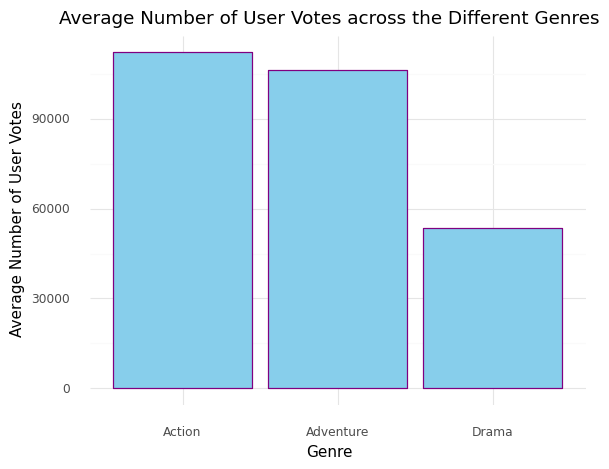

<ggplot: (314103122)>

In [18]:
(ggplot(DF_user_votes_genres, aes(x = 'genre', y='avg_user_votes')) + geom_bar(stat = "identity", color = "purple", fill="skyblue") + theme_minimal() + ggtitle("Average Number of User Votes across the Different Genres") + labs(x = "Genre", y = "Average Number of User Votes"))

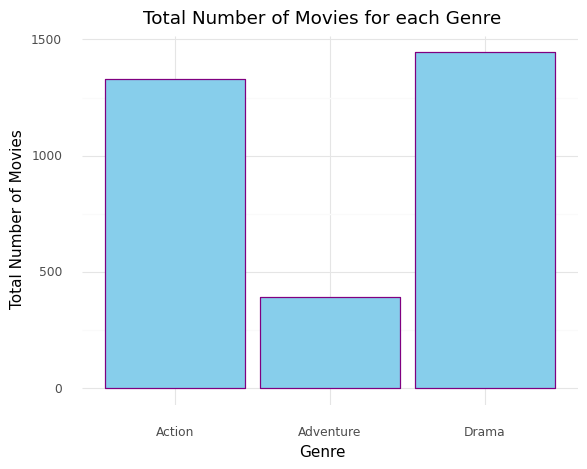

<ggplot: (314154000)>

In [19]:
(ggplot(DF_user_votes_genres, aes(x = 'genre', y='count')) + geom_bar(stat = "identity", color = "purple", fill="skyblue") + theme_minimal() + ggtitle("Total Number of Movies for each Genre") + labs(x = "Genre", y = "Total Number of Movies"))

# Question 6

## What is the minimum number of features needed to predict whether a movie will gross over 250K and over 500K with at least 70% accuracy? 

In [20]:
for i in data.columns:
    print(i)

budget
company
country
director
genre
genre_encoded
gross
name
rating
rating_encoded
released
runtime
score
star
votes
writer
year released
year_assignments


In [21]:
cont_features = ['budget', 'runtime', 'score', 'votes', 'year released', 'gross']
cont_predictors = ['budget', 'runtime', 'score', 'votes', 'year released']

In [22]:
data_gross_cont_filtered = data[cont_features]
data_gross_cont_filtered.tail()

,budget,runtime,score,votes,year released,gross
6815,0,91,5.4,9161,2016,4750497
6816,0,90,4.9,1959,2016,28368
6817,3500000,76,6.5,36333,2016,3775000
6818,0,76,6.2,6947,2016,25981
6819,0,120,6.7,2411,2016,37757


In [23]:
gross_over_250k = []
gross_over_500k = []
for i in data_gross_cont_filtered['gross']:
    if i > 250000:
        gross_over_250k.append(1)
    else:
        gross_over_250k.append(0)
    if i > 500000:
        gross_over_500k.append(1)
    else:
        gross_over_500k.append(0)

print(len(gross_over_250k))
print(len(gross_over_500k))

6820
6820


In [24]:
data_gross_cont_filtered['gross_over_250k'] = gross_over_250k
data_gross_cont_filtered['gross_over_500k'] = gross_over_500k
data_gross_cont_filtered.tail(8)

,budget,runtime,score,votes,year released,gross,gross_over_250k,gross_over_500k
6812,0,96,5.7,4439,2016,23020,0,0
6813,0,120,6.2,6054,2016,228894,0,0
6814,20000000,107,6.3,19084,2016,36874745,1,1
6815,0,91,5.4,9161,2016,4750497,1,1
6816,0,90,4.9,1959,2016,28368,0,0
6817,3500000,76,6.5,36333,2016,3775000,1,1
6818,0,76,6.2,6947,2016,25981,0,0
6819,0,120,6.7,2411,2016,37757,0,0


## Logistic Regression Models before PCA

In [25]:
# vars mse and r2 scores
LR_mse_250k = 0
LR_r2_250k = 0
LR_Model_250k = LogisticRegression()

LR_mse_500k = 0
LR_r2_500k = 0
LR_Model_500k = LogisticRegression()

z = StandardScaler()

In [26]:
X_train_250k, X_test_250k, y_train_250k, y_test_250k = train_test_split(data_gross_cont_filtered[cont_predictors], data_gross_cont_filtered["gross_over_250k"], test_size=0.1)

print("Logistic Regression Model test/train sets for predicting over 250K:")
print("{0:0.2f}% data is in training set.".format((len(X_train_250k)/len(data_gross_cont_filtered.index))*100))
print("{0:0.2f}% data is in test set.".format((len(X_test_250k)/len(data_gross_cont_filtered.index))*100))

print("\n")
X_train_500k, X_test_500k, y_train_500k, y_test_500k = train_test_split(data_gross_cont_filtered[cont_predictors], data_gross_cont_filtered["gross_over_500k"], test_size=0.1)

print("Logistic Regression Model test/train sets for predicting over 500K:")
print("{0:0.2f}% data is in training set.".format((len(X_train_500k)/len(data_gross_cont_filtered.index))*100))
print("{0:0.2f}% data is in test set.".format((len(X_test_500k)/len(data_gross_cont_filtered.index))*100))

Logistic Regression Model test/train sets for predicting over 250K:
90.00% data is in training set.
10.00% data is in test set.


Logistic Regression Model test/train sets for predicting over 500K:
90.00% data is in training set.
10.00% data is in test set.


In [27]:
X_train_250k[cont_predictors] = z.fit_transform(X_train_250k[cont_predictors]) # z-score and fit bc model is trained with train data
X_test_250k[cont_predictors] = z.transform(X_test_250k[cont_predictors]) # z-score but do not fit bc do not want to leak test data into model

print("z-scored X Train for over 250K Model: ")
X_train_250k.head()

z-scored X Train for over 250K Model: 


,budget,runtime,score,votes,year released
183,-0.657971,-0.088883,0.219461,-0.538578,-1.670924
4206,-0.550761,-0.748571,0.219461,0.986797,0.448088
6140,-0.389945,-0.748571,-0.080395,-0.448199,1.340304
4165,-0.657971,-0.473701,1.718741,-0.432670,0.336561
1108,-0.215729,1.285469,1.019077,0.291831,-1.113289


In [28]:
X_train_500k[cont_predictors] = z.fit_transform(X_train_500k[cont_predictors]) # z-score and fit bc model is trained with train data
X_test_500k[cont_predictors] = z.transform(X_test_500k[cont_predictors]) # z-score but do not fit bc do not want to leak test data into model

print("z-scored X Train for over 500K Model: ")
X_train_500k.head()

z-scored X Train for over 500K Model: 


,budget,runtime,score,votes,year released
5514,3.628681,1.419246,1.418498,3.705072,1.113719
5053,-0.666331,-0.257913,0.421630,-0.431067,0.778160
4305,-0.666331,1.307436,0.122570,-0.136122,0.442601
5714,-0.075767,-0.872872,1.119438,-0.377069,1.113719
3656,-0.572378,-0.816966,0.321944,-0.286343,0.107042


In [35]:
LR_Model_250k.fit(X_train_250k, y_train_250k) # fit the X and y training data to the LR model

y_pred_250k = LR_Model_250k.predict(X_test_250k)

LR_mse_250k = mean_squared_error(y_test_250k, y_pred_250k)
LR_r2_250k = r2_score(y_test_250k, y_pred_250k)

print("Performance Metrics for LR Model predicting gross over 250K:\n")
print("Linear Regression Model ~ Mean Squared Error:\n" + str(LR_mse_250k) + "\n")
print("Linear Regression Model ~ r2 score:\n" + str(LR_r2_250k))

Performance Metrics for LR Model predicting gross over 250K:

Linear Regression Model ~ Mean Squared Error:
0.11290322580645161

Linear Regression Model ~ r2 score:
-0.14022060100746936


In [37]:
LR_Model_500k.fit(X_train_500k, y_train_500k) # fit the X and y training data to the LR model

y_pred_500k = LR_Model_500k.predict(X_test_500k)

LR_mse_500k = mean_squared_error(y_test_500k, y_pred_500k)
LR_r2_500k = r2_score(y_test_500k, y_pred_500k)

print("Performance Metrics for LR Model predicting gross over 500K:\n")
print("Linear Regression Model ~ Mean Squared Error:\n" + str(LR_mse_500k) + "\n")
print("Linear Regression Model ~ r2 score:\n" + str(LR_r2_500k))

Performance Metrics for LR Model predicting gross over 500K:

Linear Regression Model ~ Mean Squared Error:
0.16862170087976538

Linear Regression Model ~ r2 score:
-0.16295966785290616


## PCA Models:

### PCA Model for predicting gross over 250K

In [39]:
PCA_LR_Model_250k = LinearRegression() # init an empty Linear Regression model

# Use TTS with a 90/10 split (since data is large)
PCA_LR_X_train_250k, PCA_LR_X_test_250k, PCA_LR_y_train_250k, PCA_LR_y_test_250k = train_test_split(data_gross_cont_filtered[cont_predictors], data_gross_cont_filtered["gross_over_250k"], test_size=0.1)

# z-score predictors
PCA_LR_X_train_250k[cont_predictors] = z.fit_transform(PCA_LR_X_train_250k[cont_predictors]) # z-score and fit bc model is trained with train data
PCA_LR_X_test_250k[cont_predictors] = z.transform(PCA_LR_X_test_250k[cont_predictors]) # z-score but do not fit bc do not want to leak test data into model

PCA_Model_250k = PCA()
PCA_Model_250k.fit(PCA_LR_X_train_250k)

PCA()

In [41]:
# mapping of both training and testing set to the PCA Model
PCA_LR_X_train_250k = PCA_Model_250k.transform(PCA_LR_X_train_250k)
PCA_LR_X_test_250k = PCA_Model_250k.transform(PCA_LR_X_test_250k)

# apply PCA to the training set
PCA_LR_Model_250k.fit(PCA_LR_X_train_250k, PCA_LR_y_train_250k) # fit the X and y training data to the LR model

PCA_LR_y_pred_250k = PCA_LR_Model_250k.predict(PCA_LR_X_test_250k)

PCA_LR_mse_250k = mean_squared_error(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)
PCA_LR_r2_250k = r2_score(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)

print("PCA Linear Regression Model ~ Mean Squared Error:\n" + str(PCA_LR_mse_250k) + "\n")
print("PCA Linear Regression Model ~ r2 score:\n" + str(PCA_LR_r2_250k))

PCA Linear Regression Model ~ Mean Squared Error:
0.08700295094164881

PCA Linear Regression Model ~ r2 score:
0.055388409108696024


### PCA Model for predicting gross over 500K

In [40]:
PCA_LR_Model_500k = LinearRegression() # init an empty Linear Regression model

# Use TTS with a 90/10 split (since data is large)
PCA_LR_X_train_500k, PCA_LR_X_test_500k, PCA_LR_y_train_500k, PCA_LR_y_test_500k = train_test_split(data_gross_cont_filtered[cont_predictors], data_gross_cont_filtered["gross_over_500k"], test_size=0.1)

# z-score predictors
PCA_LR_X_train_500k[cont_predictors] = z.fit_transform(PCA_LR_X_train_500k[cont_predictors]) # z-score and fit bc model is trained with train data
PCA_LR_X_test_500k[cont_predictors] = z.transform(PCA_LR_X_test_500k[cont_predictors]) # z-score but do not fit bc do not want to leak test data into model

PCA_Model_500k = PCA()
PCA_Model_500k.fit(PCA_LR_X_train_500k)

PCA()

In [42]:
# mapping of both training and testing set to the PCA Model
PCA_LR_X_train_500k = PCA_Model_250k.transform(PCA_LR_X_train_500k)
PCA_LR_X_test_500k = PCA_Model_250k.transform(PCA_LR_X_test_500k)

# apply PCA to the training set
PCA_LR_Model_500k.fit(PCA_LR_X_train_500k, PCA_LR_y_train_500k) # fit the X and y training data to the LR model

PCA_LR_y_pred_500k = PCA_LR_Model_500k.predict(PCA_LR_X_test_500k)

PCA_LR_mse_500k = mean_squared_error(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)
PCA_LR_r2_500k = r2_score(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)

print("PCA Linear Regression Model ~ Mean Squared Error:\n" + str(PCA_LR_mse_500k) + "\n")
print("PCA Linear Regression Model ~ r2 score:\n" + str(PCA_LR_r2_500k))

PCA Linear Regression Model ~ Mean Squared Error:
0.12027649405617974

PCA Linear Regression Model ~ r2 score:
0.06193329608487086


## Creating Dataframes of Principle Components

### Principle Components Dataframe for model predicting gross over 250K:

In [45]:
PCA_DF_250k = pd.DataFrame({
    "Explained_Variance": PCA_Model_250k.explained_variance_ratio_,
    "Principle_Components": range(1, 6),
    "Cumulative_Variance": PCA_Model_250k.explained_variance_ratio_.cumsum()
})

PCA_DF_250k.head()

,Explained_Variance,Principle_Components,Cumulative_Variance
0,0.419094,1,0.419094
1,0.220412,2,0.639505
2,0.159264,3,0.798769
3,0.129991,4,0.928760
4,0.071240,5,1.000000


### Principle Components Dataframe for model predicting gross over 500K:

In [46]:
PCA_DF_500k = pd.DataFrame({
    "Explained_Variance": PCA_Model_500k.explained_variance_ratio_,
    "Principle_Components": range(1, 6),
    "Cumulative_Variance": PCA_Model_500k.explained_variance_ratio_.cumsum()
})

PCA_DF_500k.head()

,Explained_Variance,Principle_Components,Cumulative_Variance
0,0.417094,1,0.417094
1,0.223342,2,0.640436
2,0.157991,3,0.798427
3,0.129256,4,0.927683
4,0.072317,5,1.000000


## Creating the PCA Skree Plots

### PCA Skree Plots for Model predicting gross over 250K:

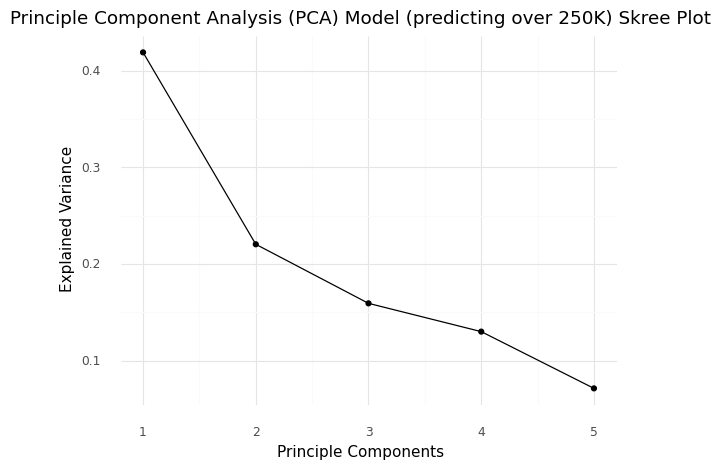

<ggplot: (314247732)>

In [49]:
# pca a scree plot
(ggplot(PCA_DF_250k, aes(x = "Principle_Components", y = "Explained_Variance")) + geom_point() + geom_line() + theme_minimal() + ggtitle("Principle Component Analysis (PCA) Model (predicting over 250K) Skree Plot") + labs(x = "Principle Components", y = "Explained Variance"))

### *Inversed Variant* PCA Skree Plots for Model predicting gross over 250K:

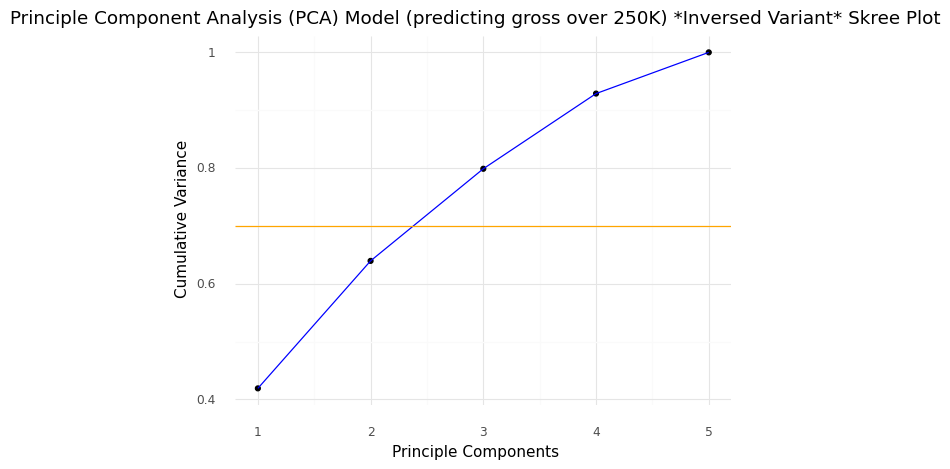

<ggplot: (316576244)>

In [50]:
# Figure out how many PCs you need to keep to retain 70% of the original variance.
(ggplot(PCA_DF_250k, aes(x = "Principle_Components", y = "Cumulative_Variance")) + geom_point() + geom_line(color = "blue") + geom_hline(yintercept = 0.70, color = "orange") + theme_minimal() + ggtitle("Principle Component Analysis (PCA) Model (predicting gross over 250K) *Inversed Variant* Skree Plot") + labs(x = "Principle Components", y = "Cumulative Variance"))

### PCA Skree Plots for Model predicting gross over 500K:

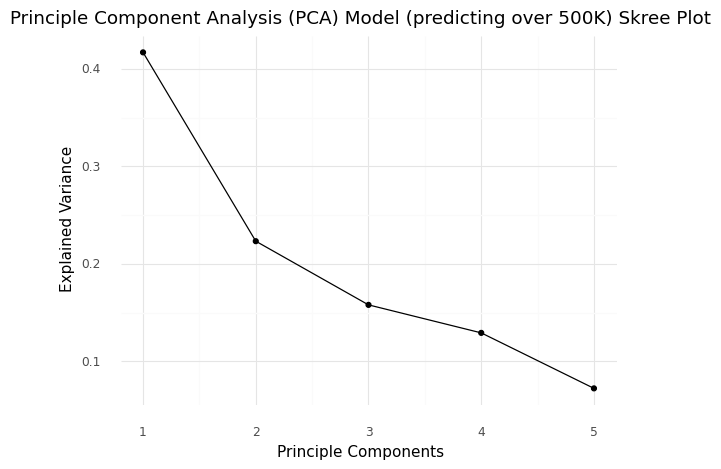

<ggplot: (316506685)>

In [48]:
# pca a scree plot
(ggplot(PCA_DF_500k, aes(x = "Principle_Components", y = "Explained_Variance")) + geom_point() + geom_line() + theme_minimal() + ggtitle("Principle Component Analysis (PCA) Model (predicting over 500K) Skree Plot") + labs(x = "Principle Components", y = "Explained Variance"))

### *Inversed Variant* PCA Skree Plots for Model predicting gross over 500K:

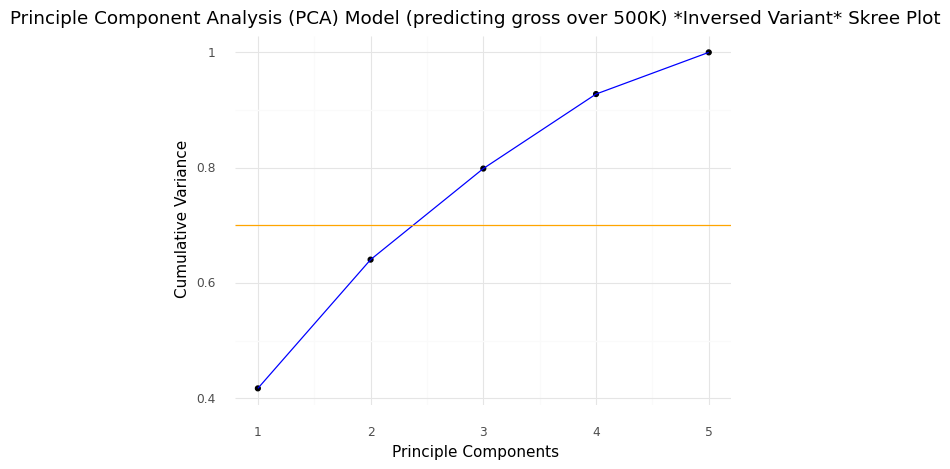

<ggplot: (313921392)>

In [52]:
# Figure out how many PCs you need to keep to retain 70% of the original variance.
(ggplot(PCA_DF_500k, aes(x = "Principle_Components", y = "Cumulative_Variance")) + geom_point() + geom_line(color = "blue") + geom_hline(yintercept = 0.70, color = "orange") + theme_minimal() + ggtitle("Principle Component Analysis (PCA) Model (predicting gross over 500K) *Inversed Variant* Skree Plot") + labs(x = "Principle Components", y = "Cumulative Variance"))

In [53]:
# method used to calculate the min number of principle components to achieve the threshold cumulative accuracy
def calc_min_pc(data_frame, col_name, threshold):
    pc_index = 0
    for pc in data_frame[col_name]:
        pc_index += 1
        if pc >= threshold:
            return pc_index

In [56]:
# figuring out how many PCs need to keep to retain 70% of the original variance
min_pc_250k = calc_min_pc(PCA_DF_250k, 'Cumulative_Variance', 0.70)
min_pc_500k = calc_min_pc(PCA_DF_500k, 'Cumulative_Variance', 0.70)

print("\n")
print("According to PCA, the Logistic Regression Model only needs " + str(min_pc_250k) + " Principle Components to predict a movie will gross over 250K with at least 70% accuracy")
print("\n")
print("According to PCA, the Logistic Regression Model only needs " + str(min_pc_500k) + " Principle Components to predict a movie will gross over 500K with at least 70% accuracy")
print("\n")



According to PCA, the Logistic Regression Model only needs 3 Principle Components to predict a movie will gross over 250K with at least 70% accuracy


According to PCA, the Logistic Regression Model only needs 3 Principle Components to predict a movie will gross over 500K with at least 70% accuracy




## Creating new LR Models knowing now that we only need 3 principle components
### We are creating these models to ensure that these models are in fact predicting with at least 70% accuracy

In [57]:
mod_PCA_Model_250k = PCA(n_components = min_pc_250k)
mod_PCA_Model_250k.fit(PCA_LR_X_train_250k)

PCA(n_components=3)

In [58]:
mod_PCA_Model_500k = PCA(n_components = min_pc_500k)
mod_PCA_Model_500k.fit(PCA_LR_X_train_500k)

PCA(n_components=3)

In [59]:
# 250k model
mod_train_y_pred_250k = PCA_LR_Model_250k.predict(PCA_LR_X_train_250k)

train_mod_mse_250k = mean_squared_error(PCA_LR_y_train_250k, mod_train_y_pred_250k)
test_mod_mse_250k = mean_squared_error(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)

train_mod_r2_250k = r2_score(PCA_LR_y_train_250k, mod_train_y_pred_250k)
test_mod_r2_250k = r2_score(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)

# 500k model
mod_train_y_pred_500k = PCA_LR_Model_500k.predict(PCA_LR_X_train_500k)

train_mod_mse_500k = mean_squared_error(PCA_LR_y_train_500k, mod_train_y_pred_500k)
test_mod_mse_500k = mean_squared_error(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)

train_mod_r2_500k = r2_score(PCA_LR_y_train_500k, mod_train_y_pred_500k)
test_mod_r2_500k = r2_score(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)

In [60]:
print("PCA Model (250k model) MSE (Train): " + str(train_mod_mse_250k))
print("PCA Model (250k model) MSE (Test): " + str(test_mod_mse_250k) + "\n")

print("PCA Model (250k model) r2 (Train): " + str(train_mod_r2_250k))
print("PCA Model (250k model) r2 (Test): " + str(test_mod_r2_250k))

PCA Model (250k model) MSE (Train): 0.09494869582794428
PCA Model (250k model) MSE (Test): 0.08700295094164881

PCA Model (250k model) r2 (Train): 0.0717935449312338
PCA Model (250k model) r2 (Test): 0.055388409108696024


In [61]:
print("PCA Model (500k model) MSE (Train): " + str(train_mod_mse_500k))
print("PCA Model (500k model) MSE (Test): " + str(test_mod_mse_500k) + "\n")

print("PCA Model (500k model) r2 (Train): " + str(train_mod_r2_500k))
print("PCA Model (500k model) r2 (Test): " + str(test_mod_r2_500k))

PCA Model (500k model) MSE (Train): 0.12390622975299449
PCA Model (500k model) MSE (Test): 0.12027649405617974

PCA Model (500k model) r2 (Train): 0.08628178438218626
PCA Model (500k model) r2 (Test): 0.06193329608487086
